### GBDT手动实现

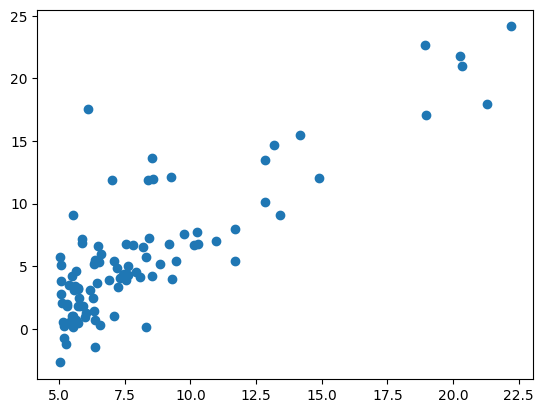

In [27]:
# 加载数据
import numpy as np
import matplotlib.pyplot as plt
def loaddata():
    data = np.loadtxt('data/data.txt',delimiter=',')
    n = data.shape[1]-1 # 特征数
    X = data[:,0:n]
    y = data[:,-1].reshape(-1,1)
    return X,y
    
X,y = loaddata()
plt.scatter(X,y)
plt.show()

In [28]:
from sklearn.tree import DecisionTreeRegressor
# 定义第一棵树

tree_reg1 = DecisionTreeRegressor(max_depth=5)
tree_reg1.fit(X,y)

DecisionTreeRegressor(max_depth=5)

In [32]:
# 计算残差，将残差作为目标值训练第二棵树
y2 = y - tree_reg1.predict(X).reshape(-1,1)
tree_reg2 = DecisionTreeRegressor(max_depth=5)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(max_depth=5)

In [33]:
# 继续计算残差，将残差作为目标值训练第三棵树
y3 = y2 - tree_reg2.predict(X).reshape(-1,1)
tree_reg3 = DecisionTreeRegressor(max_depth=5)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(max_depth=5)

In [34]:
# 取训练集前5条数据进行测试
X_new = X[0:5,]
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1,tree_reg2,tree_reg3))
print('y_pred: ', y_pred)
print('real_y: ',y[0:5].reshape(1,-1))
print(y_pred - y[0:5].reshape(1,-1))

y_pred:  [17.61560196  9.15380196 12.831       4.57199973  6.68971688]
real_y:  [[17.592   9.1302 13.662  11.854   6.8233]]
[[ 0.02360196  0.02360196 -0.831      -7.28200027 -0.13358312]]


### 直接使用sklearn提供的GradientBoostingRegressor

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=5, n_estimators=3,learning_rate=1.0)
gbrt.fit(X,y)
print(gbrt.predict(X_new))

[17.61560196  9.15380196 12.831       4.57199973  6.68971688]


/home/xkzhai/miniconda3/envs/MLiA/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
